In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')
import PIL
import tensorflow as tf

In [2]:
DIRECTORY="L:\Forest-Fire-Detection\Data\Train_Data"
input_path = []
label = []

In [3]:
input_path = []
label = []

for class_name in os.listdir(DIRECTORY):
    for path in os.listdir(DIRECTORY+"/"+class_name):
        if class_name == 'Fire':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join(DIRECTORY, class_name, path))
print(input_path[0], label[0])

L:\Forest-Fire-Detection\Data\Train_Data\Fire\F_0.jpg 0


In [4]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  L:\Forest-Fire-Detection\Data\Train_Data\Fire\...      0
1  L:\Forest-Fire-Detection\Data\Train_Data\Fire\...      0
2  L:\Forest-Fire-Detection\Data\Train_Data\Non_F...      1
3  L:\Forest-Fire-Detection\Data\Train_Data\Non_F...      1
4  L:\Forest-Fire-Detection\Data\Train_Data\Non_F...      1

In [5]:
#checking for wrong files
for i in df['images']:
    if '.jpg' not in i:
        print(i)

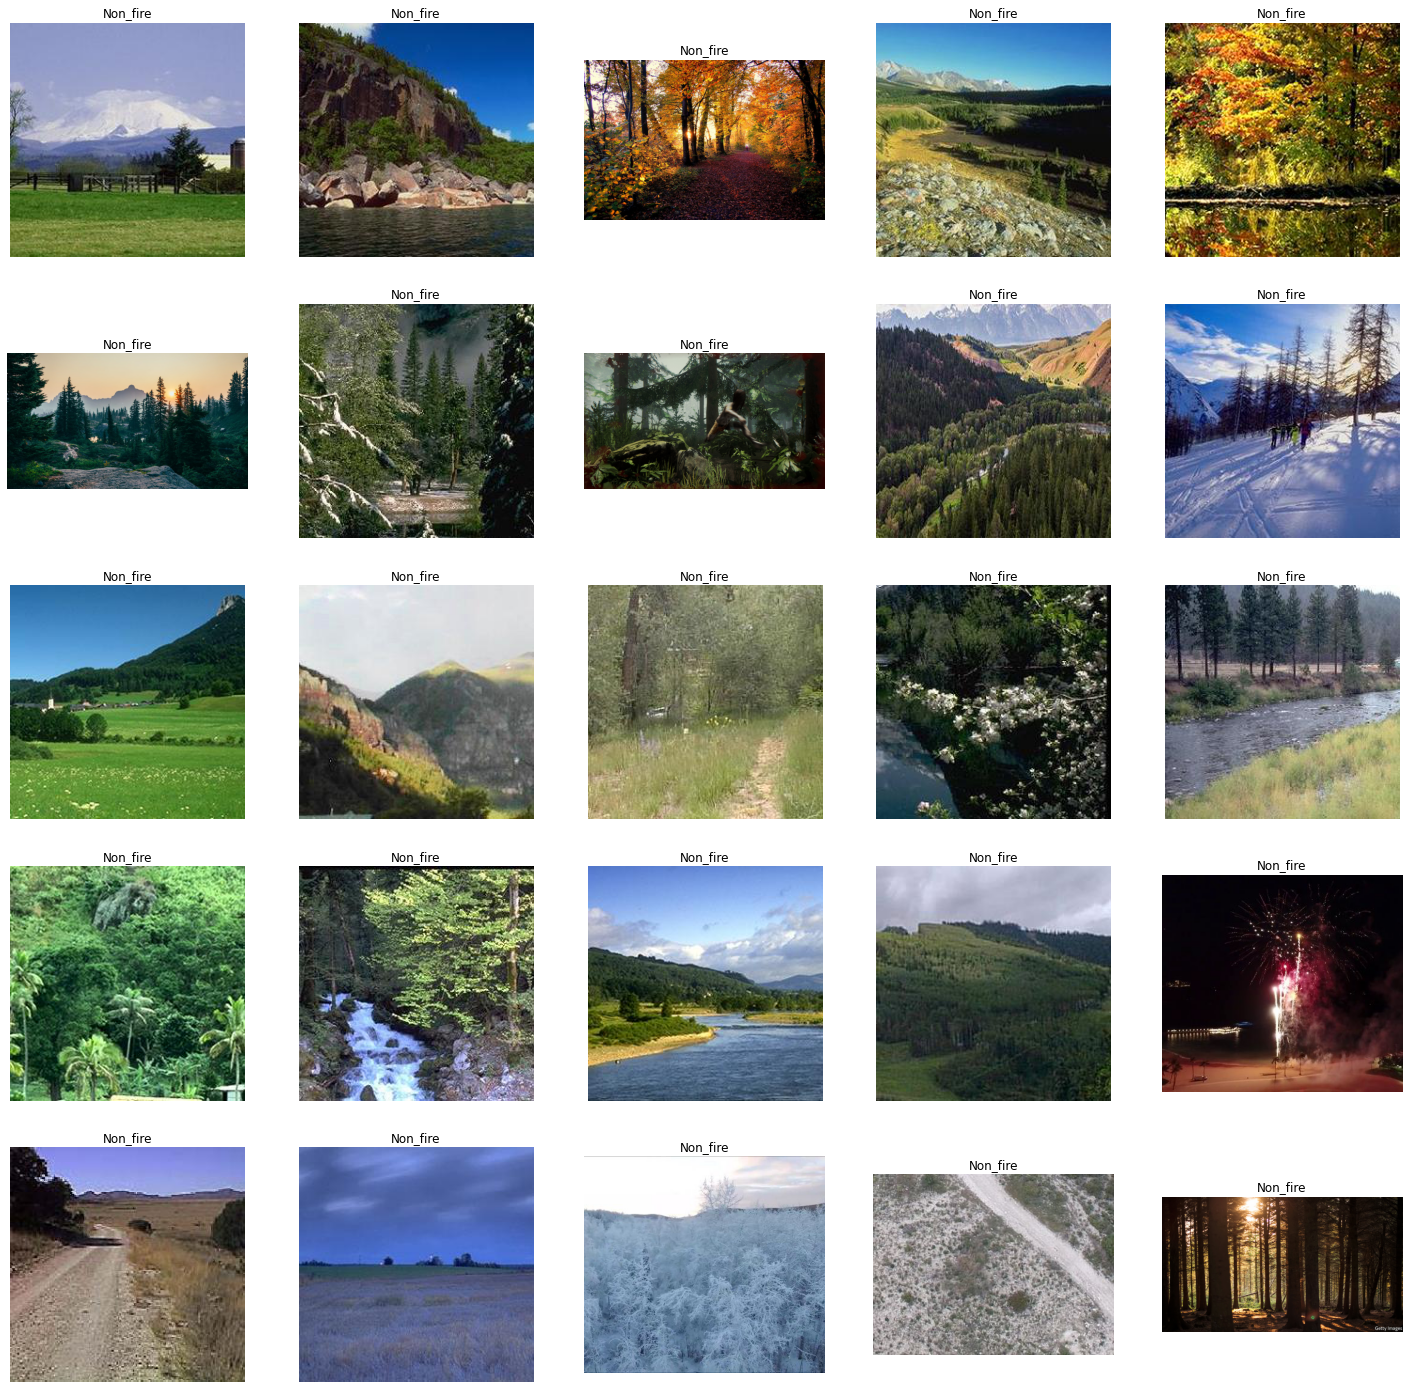

In [6]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Non_fire')
    plt.axis('off')

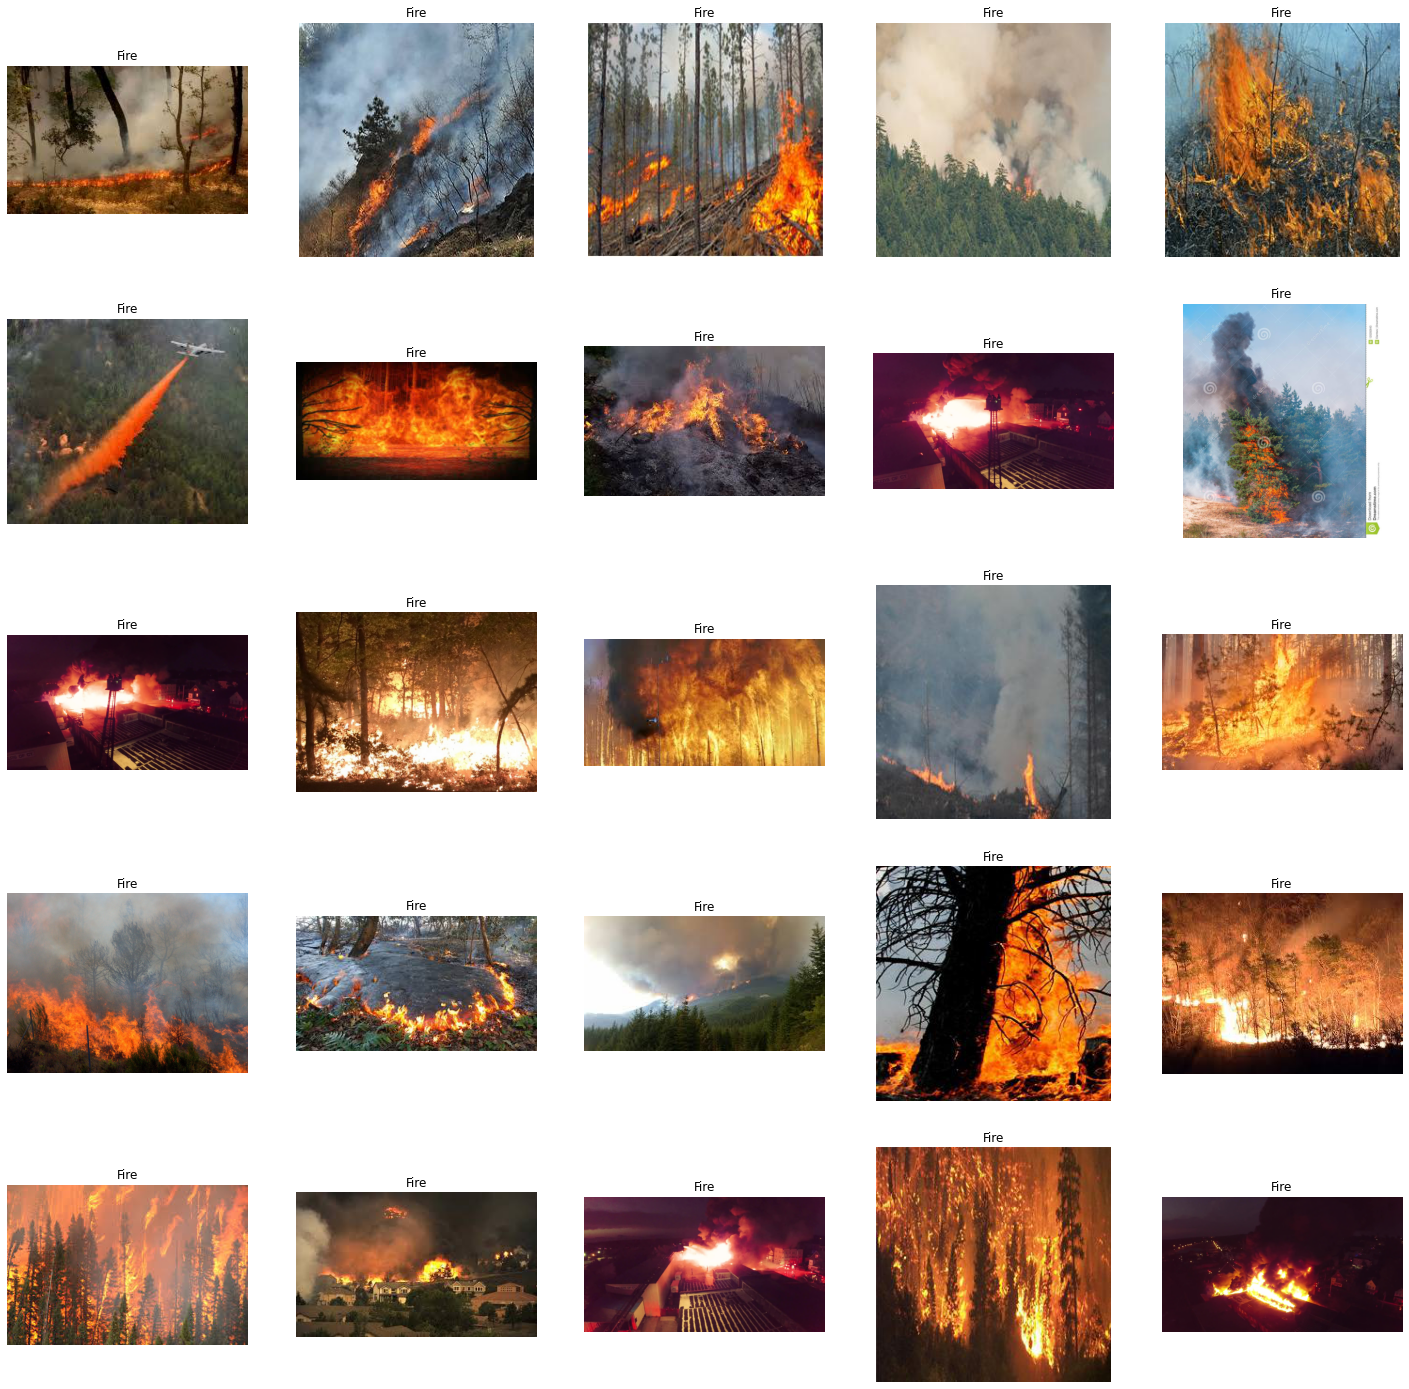

In [7]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Fire')
    plt.axis('off')

<AxesSubplot:xlabel='label', ylabel='count'>

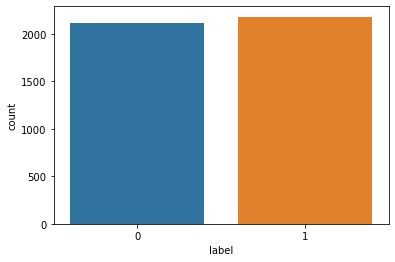

In [8]:
import seaborn as sns
sns.countplot(df['label'])

In [9]:
df['label'] = df['label'].astype('str')


In [10]:
df.head()


images label
0  L:\Forest-Fire-Detection\Data\Train_Data\Fire\...     0
1  L:\Forest-Fire-Detection\Data\Train_Data\Fire\...     0
2  L:\Forest-Fire-Detection\Data\Train_Data\Non_F...     1
3  L:\Forest-Fire-Detection\Data\Train_Data\Non_F...     1
4  L:\Forest-Fire-Detection\Data\Train_Data\Non_F...     1

In [11]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)


Found 3432 validated image filenames belonging to 2 classes.
Found 859 validated image filenames belonging to 2 classes.


In [13]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [15]:

history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)


Epoch 1/10
7/7 [==============================] - 54s 8s/step - loss: 0.9756 - accuracy: 0.5224 - val_loss: 0.5747 - val_accuracy: 0.6845
Epoch 2/10
7/7 [==============================] - 55s 8s/step - loss: 0.4616 - accuracy: 0.7955 - val_loss: 0.3632 - val_accuracy: 0.8673
Epoch 3/10
7/7 [==============================] - 55s 8s/step - loss: 0.3085 - accuracy: 0.8727 - val_loss: 0.2542 - val_accuracy: 0.8836
Epoch 4/10
7/7 [==============================] - 55s 8s/step - loss: 0.2575 - accuracy: 0.8875 - val_loss: 0.2721 - val_accuracy: 0.8999
Epoch 5/10
7/7 [==============================] - 55s 8s/step - loss: 0.2343 - accuracy: 0.9033 - val_loss: 0.2394 - val_accuracy: 0.8917
Epoch 6/10
7/7 [==============================] - 58s 8s/step - loss: 0.2429 - accuracy: 0.8974 - val_loss: 0.2791 - val_accuracy: 0.8976
Epoch 7/10
7/7 [==============================] - 56s 9s/step - loss: 0.2276 - accuracy: 0.9062 - val_loss: 0.2243 - val_accuracy: 0.9127
Epoch 8/10
7/7 [==================

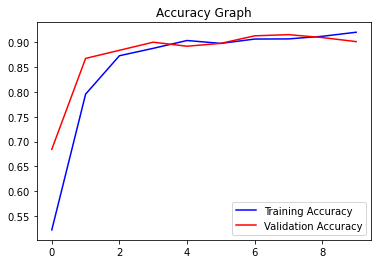

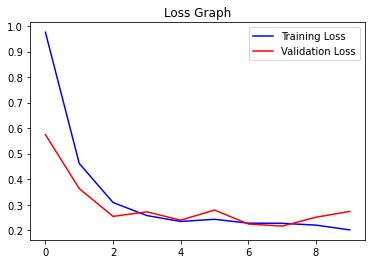

In [16]:
#visualizing
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [17]:
model.evaluate(train_iterator)

7/7 [==============================] - 71s 10s/step - loss: 0.2136 - accuracy: 0.9138


[0.21357403695583344, 0.9137529134750366]

In [21]:
tf.keras.models.save_model(model,'firepredmodel.hdf5')